
<img align = 'center' src="../../Images/ML_SWE.jpg" alt = '.../Images/' width = '1000'/>

# Model Training


This notebook exemplifies the Sierra Snow Model (SSM) (a derivation of the National Snow Model (NSM)) data processing (through the DataProcess.py script), and model training, predictions, and preliminary evaluation via the MLP_model.py script.
With the focus of GeoSMART Hack Week to advance machine learning modeling skill sets, the motivation of the SSM project is for participants to modify the MLP_model.py script.
Suggested modifications include optimizing the current multilayered-perceptron (MLP) neural network algorithm or selecting and optimizing a different ML algorithm (strongly encouraged).
We encourage advanced modelers to contact Dr. Ryan Johnson (rjohnson18@ua.edu) for ideas and methods to optimize the model framework, there are several concepts of interest including feature engineering, domain optimization, feature selection, etc.

The following workflow exemplifies the steps and python files to process the training data, train a model, produce predictions, and perform preliminary evaluations

In [1]:
import os
import MLP_Model
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
from shared_scripts import DataProcess, Hindcast_Initialization, NSM_SCA, SSWEET
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

#Set working directories
cwd = os.getcwd()
datapath = f"{os.path.expanduser('~')}/SWEML" 

2024-03-18 18:23:04.174224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-03-18 18:23:04.174244: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#Define hold out year
HOY = 2019
modelname = "Neural_Network"
Region_list = [ 'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low','Greater_Yellowstone', 
     'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade',
     'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 
     'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast',
     'Greater_Glacier', 'Or_Coast'
              ]
#Region_list = ['N_Co_Rockies'] #N_Co_Rockies, S_Sierras_High, Greater_Yellowstone, S_Sierras_Low
frequency = 'Daily'
threshold = 10
fSCA =  True

Processing training dataframes for each region
N_Sierras
./Model/N_Sierras/fSCA_True/N_Sierras_SWEmax.npy
S_Sierras_High
./Model/S_Sierras_High/fSCA_True/S_Sierras_High_SWEmax.npy
S_Sierras_Low
./Model/S_Sierras_Low/fSCA_True/S_Sierras_Low_SWEmax.npy
Greater_Yellowstone
./Model/Greater_Yellowstone/fSCA_True/Greater_Yellowstone_SWEmax.npy
N_Co_Rockies
./Model/N_Co_Rockies/fSCA_True/N_Co_Rockies_SWEmax.npy
SW_Mont
./Model/SW_Mont/fSCA_True/SW_Mont_SWEmax.npy
SW_Co_Rockies
./Model/SW_Co_Rockies/fSCA_True/SW_Co_Rockies_SWEmax.npy
GBasin
./Model/GBasin/fSCA_True/GBasin_SWEmax.npy
N_Wasatch
./Model/N_Wasatch/fSCA_True/N_Wasatch_SWEmax.npy
N_Cascade
./Model/N_Cascade/fSCA_True/N_Cascade_SWEmax.npy
S_Wasatch
./Model/S_Wasatch/fSCA_True/S_Wasatch_SWEmax.npy
SW_Mtns
./Model/SW_Mtns/fSCA_True/SW_Mtns_SWEmax.npy
E_WA_N_Id_W_Mont
./Model/E_WA_N_Id_W_Mont/fSCA_True/E_WA_N_Id_W_Mont_SWEmax.npy
S_Wyoming
./Model/S_Wyoming/fSCA_True/S_Wyoming_SWEmax.npy
SE_Co_Rockies
./Model/SE_Co_Rockies/fSCA_True/SE_

2024-03-18 18:23:15.064001: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-18 18:23:15.064020: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-18 18:23:15.064050: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (compute001.ual-ciroh.cluster): /proc/driver/nvidia/version does not exist
2024-03-18 18:23:15.064249: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Preliminary Model Analysis for:  N_Sierras
 R2 is  0.8577418109905125
 RMSE is  13.739395149010612
 R2 fSCA is  0.8493160860941025
 RMSE fSCA is  14.140423688241773


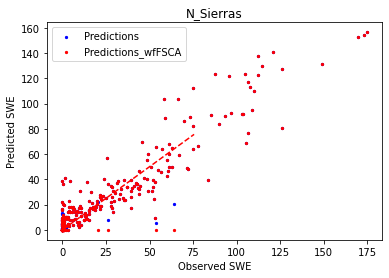

Preliminary Model Analysis for:  S_Sierras_High
 R2 is  0.714036931927945
 RMSE is  25.085471125512647
 R2 fSCA is  0.7101268461100019
 RMSE fSCA is  25.256390617176486


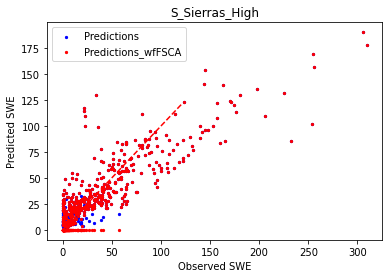

Preliminary Model Analysis for:  S_Sierras_Low
 R2 is  0.9704234062592563
 RMSE is  4.339480040197847
 R2 fSCA is  0.8708315639580458
 RMSE fSCA is  9.068632812823832


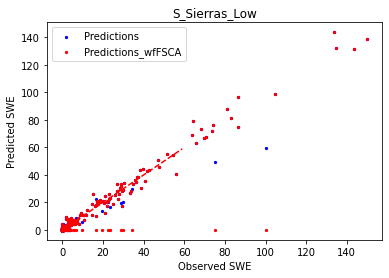

Preliminary Model Analysis for:  Greater_Yellowstone
 R2 is  0.734824849141629
 RMSE is  10.335512353398148
 R2 fSCA is  0.7325835166099562
 RMSE fSCA is  10.379099725517479


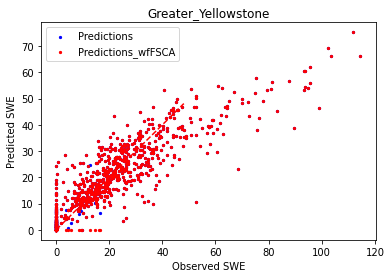

Preliminary Model Analysis for:  N_Co_Rockies
 R2 is  0.5648344867986173
 RMSE is  13.225148308938762
 R2 fSCA is  0.574442852345052
 RMSE fSCA is  13.07832906542715


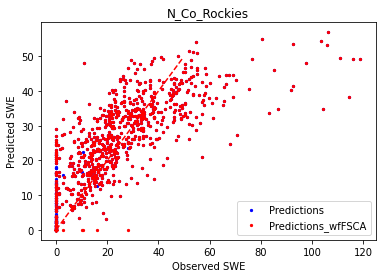

Preliminary Model Analysis for:  SW_Mont
 R2 is  0.9907002839540798
 RMSE is  1.7013425163644138
 R2 fSCA is  0.9801341907349964
 RMSE fSCA is  2.486623546248031


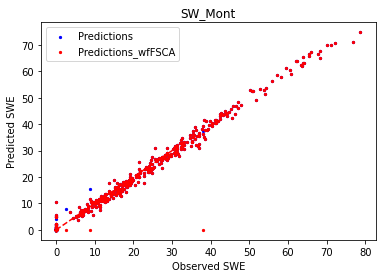

Preliminary Model Analysis for:  SW_Co_Rockies
 R2 is  0.8583788217537328
 RMSE is  5.846926774236814
 R2 fSCA is  0.8577339609132532
 RMSE fSCA is  5.8602234145715695


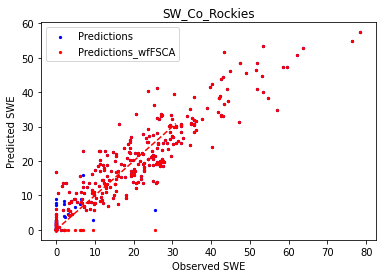

Preliminary Model Analysis for:  GBasin
 R2 is  0.9112972264519559
 RMSE is  4.626649578707777
 R2 fSCA is  0.9005552422801135
 RMSE fSCA is  4.898791488961442


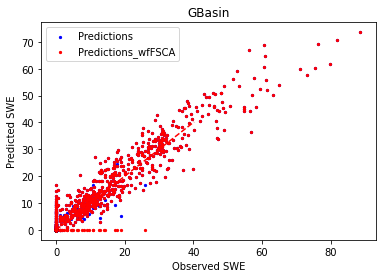

Preliminary Model Analysis for:  N_Wasatch
 R2 is  0.9110479964046616
 RMSE is  6.744037004980765
 R2 fSCA is  0.9010062236038274
 RMSE fSCA is  7.114526858031511


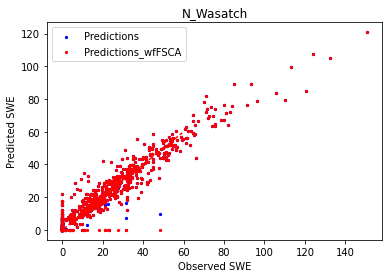

Preliminary Model Analysis for:  N_Cascade
 R2 is  0.8782381221508468
 RMSE is  18.38423283340067
 R2 fSCA is  0.8448068926755475
 RMSE fSCA is  20.75515864871733


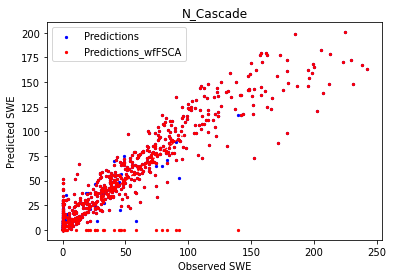

Preliminary Model Analysis for:  S_Wasatch
 R2 is  0.9004264742730542
 RMSE is  4.067968405921188
 R2 fSCA is  0.88123920745722
 RMSE fSCA is  4.442650739453187


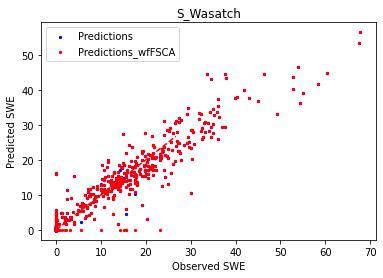

Preliminary Model Analysis for:  SW_Mtns
 R2 is  0.9048365228214608
 RMSE is  2.047259141484026
 R2 fSCA is  0.8189722439615442
 RMSE fSCA is  2.8236460228272353


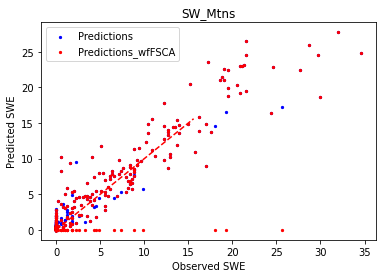

Preliminary Model Analysis for:  E_WA_N_Id_W_Mont
 R2 is  0.8561020357335264
 RMSE is  13.027022368533292
 R2 fSCA is  0.8503210286149668
 RMSE fSCA is  13.2861217803003


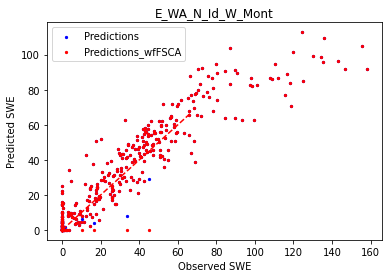

Preliminary Model Analysis for:  S_Wyoming
 R2 is  0.9030578918688239
 RMSE is  6.969422660753935
 R2 fSCA is  0.9195212179461074
 RMSE fSCA is  6.350110327710296


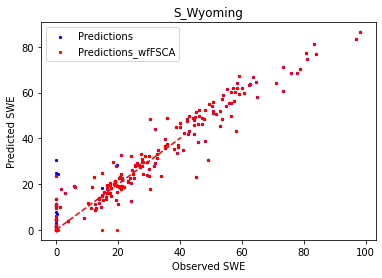

Preliminary Model Analysis for:  SE_Co_Rockies
 R2 is  0.9434965598333779
 RMSE is  2.341560028678354
 R2 fSCA is  0.9418656693631455
 RMSE fSCA is  2.3751125197793233


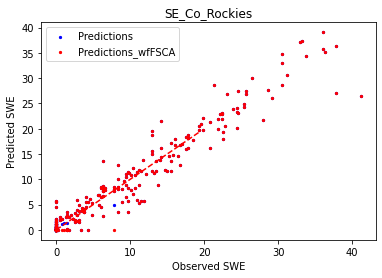

Preliminary Model Analysis for:  Sawtooth
 R2 is  0.9060370770164614
 RMSE is  9.917477097631668
 R2 fSCA is  0.8973168268511627
 RMSE fSCA is  10.367465230808614


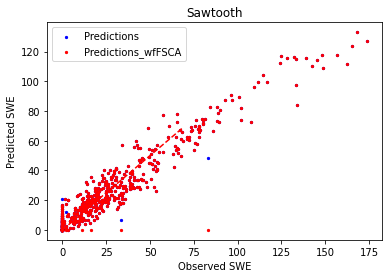

Preliminary Model Analysis for:  Ca_Coast
 R2 is  0.8994042993949282
 RMSE is  6.660164469408878
 R2 fSCA is  0.8976561801815848
 RMSE fSCA is  6.717784303812575


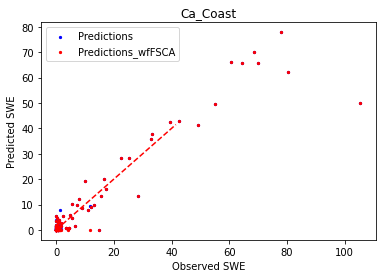

Preliminary Model Analysis for:  E_Or
 R2 is  0.9081370842859894
 RMSE is  3.98515003777126
 R2 fSCA is  0.8735458277700403
 RMSE fSCA is  4.675640863189437


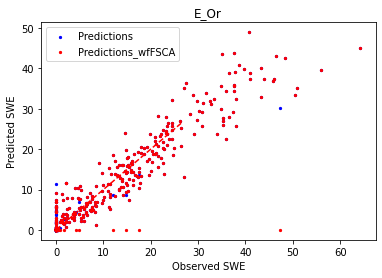

Preliminary Model Analysis for:  N_Yellowstone
 R2 is  0.9781558950687372
 RMSE is  2.708774698278025
 R2 fSCA is  0.9499165701308129
 RMSE fSCA is  4.101595129164678


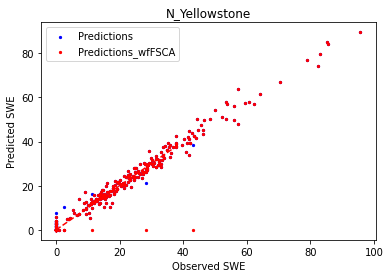

Preliminary Model Analysis for:  S_Cascade
 R2 is  0.8611579210607389
 RMSE is  8.926190204116711
 R2 fSCA is  0.8045742454841235
 RMSE fSCA is  10.590012714420173


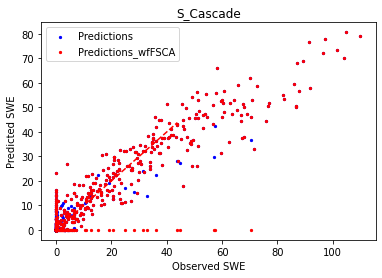

Preliminary Model Analysis for:  Wa_Coast
 R2 is  0.8421980986044799
 RMSE is  4.351952611772735
 R2 fSCA is  0.469843381089163
 RMSE fSCA is  7.976826310627993


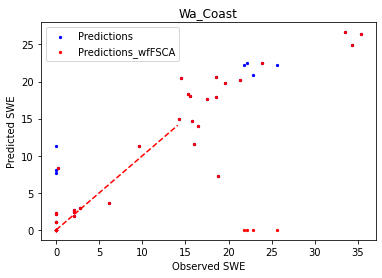

Preliminary Model Analysis for:  Greater_Glacier
 R2 is  0.976371320631222
 RMSE is  3.819562504759923
 R2 fSCA is  0.9557290011973845
 RMSE fSCA is  5.228216422421812


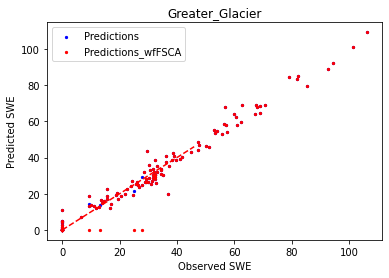

Preliminary Model Analysis for:  Or_Coast
 R2 is  0.898892314950472
 RMSE is  4.917229993898157
 R2 fSCA is  0.8990980237971999
 RMSE fSCA is  4.912225266853661


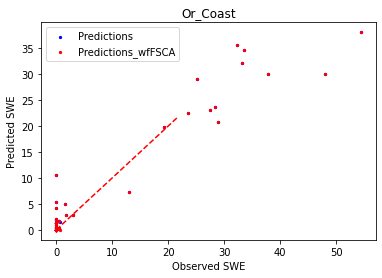

,Region,R2,RMSE,R2_fSCA,RMSE_fSCA
0,N_Sierras,0.86,13.74,0.85,14.14
0,S_Sierras_High,0.71,25.09,0.71,25.26
0,S_Sierras_Low,0.97,4.34,0.87,9.07
0,Greater_Yellowstone,0.73,10.34,0.73,10.38
0,N_Co_Rockies,0.56,13.23,0.57,13.08
0,SW_Mont,0.99,1.7,0.98,2.49
0,SW_Co_Rockies,0.86,5.85,0.86,5.86
0,GBasin,0.91,4.63,0.9,4.9
0,N_Wasatch,0.91,6.74,0.9,7.11
0,N_Cascade,0.88,18.38,0.84,20.76


In [3]:
#Run data processing script to partition key regional dataframes
#note, need to load RegionTrain_SCA.h5,
RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, RegionTest_notScaled = DataProcess.DataProcess(HOY, frequency, modelname, Region_list, fSCA = fSCA)

#model training, each participants model will be different but should follow the prescribed input feature template
# epochs= 30 #trying 10-KGE0.53, 30- done, 60- done, 100
# batchsize = 60
# MLP_Model.Model_train(epochs,batchsize, RegionTrain, RegionTest, RegionObs_Train, RegionObs_Test, Region_list, fSCA = fSCA)

#Need to create Predictions folder if running for the first time
Predictions = MLP_Model.Model_predict(RegionTest, RegionObs_Test, RegionTest_notScaled, Region_list, fSCA = fSCA)
Performance = MLP_Model.Prelim_Eval(Predictions)
Performance

Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low', 'Greater_Yellowstone', 'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade', 'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast', 'Greater_Glacier', 'Or_Coast'  regions for water year  2019


  0%|          | 0/263 [00:00<?, ?it/s]2024-03-08 14:00:44.159723: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-08 14:00:44.159763: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-08 14:00:44.159788: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-whitelightning450): /proc/driver/nvidia/version does not exist
2024-03-08 14:00:44.160575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5 out of the last 58 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7a8684223700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


6 out of the last 59 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7a860c580ee0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
  1%|          | 3/263 [00:30<43:04,  9.94s/it]

No snow in region:  Or_Coast


  2%|▏         | 4/263 [00:39<40:34,  9.40s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Or_Coast


  2%|▏         | 5/263 [00:47<38:16,  8.90s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Or_Coast


  2%|▏         | 6/263 [00:55<36:48,  8.59s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Or_Coast


  3%|▎         | 7/263 [01:03<36:03,  8.45s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Or_Coast


  3%|▎         | 8/263 [01:11<36:03,  8.48s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  3%|▎         | 9/263 [01:19<34:41,  8.19s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  4%|▍         | 10/263 [01:26<33:40,  7.99s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  4%|▍         | 11/263 [01:34<32:55,  7.84s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  5%|▍         | 12/263 [01:42<32:38,  7.80s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  5%|▍         | 13/263 [01:50<32:47,  7.87s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  5%|▌         | 14/263 [01:57<32:23,  7.80s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  6%|▌         | 15/263 [02:05<31:44,  7.68s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  6%|▌         | 16/263 [02:12<31:20,  7.61s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  6%|▋         | 17/263 [02:20<31:15,  7.62s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  7%|▋         | 18/263 [02:28<31:56,  7.82s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  7%|▋         | 19/263 [02:35<31:11,  7.67s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


  8%|▊         | 20/263 [02:43<30:51,  7.62s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  8%|▊         | 21/263 [02:50<30:03,  7.45s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  N_Yellowstone
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


  8%|▊         | 22/263 [02:57<29:30,  7.34s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  N_Yellowstone
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


  9%|▊         | 23/263 [03:04<28:47,  7.20s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  N_Yellowstone
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


  9%|▉         | 24/263 [03:11<28:05,  7.05s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 10%|▉         | 25/263 [03:18<28:32,  7.20s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 10%|▉         | 26/263 [03:26<29:12,  7.40s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 10%|█         | 27/263 [03:33<29:00,  7.37s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 11%|█         | 28/263 [03:41<28:48,  7.36s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 11%|█         | 29/263 [03:48<29:18,  7.52s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 11%|█▏        | 30/263 [03:56<28:48,  7.42s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 12%|█▏        | 31/263 [04:04<30:06,  7.79s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 12%|█▏        | 32/263 [04:13<30:37,  7.95s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 13%|█▎        | 33/263 [04:21<30:28,  7.95s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 13%|█▎        | 34/263 [04:28<30:18,  7.94s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 13%|█▎        | 35/263 [04:36<29:40,  7.81s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 14%|█▎        | 36/263 [04:44<30:10,  7.97s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 14%|█▍        | 37/263 [04:52<30:06,  7.99s/it]

No snow in region:  Or_Coast


 14%|█▍        | 38/263 [05:01<30:51,  8.23s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 15%|█▍        | 39/263 [05:09<30:36,  8.20s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 15%|█▌        | 40/263 [05:17<29:49,  8.02s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 16%|█▌        | 41/263 [05:25<30:11,  8.16s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 16%|█▌        | 42/263 [05:34<30:19,  8.23s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 16%|█▋        | 43/263 [05:42<30:13,  8.24s/it]

No snow in region:  Wa_Coast


 17%|█▋        | 44/263 [05:51<31:17,  8.57s/it]

No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 17%|█▋        | 45/263 [05:59<29:57,  8.24s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 17%|█▋        | 46/263 [06:07<29:24,  8.13s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 18%|█▊        | 47/263 [06:15<29:19,  8.15s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 18%|█▊        | 48/263 [06:23<28:49,  8.04s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 19%|█▊        | 49/263 [06:31<29:24,  8.25s/it]

No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 19%|█▉        | 50/263 [06:39<28:36,  8.06s/it]

No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 19%|█▉        | 51/263 [06:47<28:25,  8.04s/it]

No snow in region:  S_Wasatch
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 20%|█▉        | 52/263 [06:55<27:46,  7.90s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 20%|██        | 53/263 [07:03<27:43,  7.92s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 21%|██        | 54/263 [07:11<28:05,  8.07s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 21%|██        | 55/263 [07:20<29:09,  8.41s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 21%|██▏       | 56/263 [07:29<29:06,  8.44s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 24%|██▍       | 63/263 [08:34<31:00,  9.30s/it]

No snow in region:  Wa_Coast


 25%|██▍       | 65/263 [08:52<30:40,  9.30s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 25%|██▌       | 66/263 [09:01<29:56,  9.12s/it]

No snow in region:  Wa_Coast


 25%|██▌       | 67/263 [09:11<30:24,  9.31s/it]

No snow in region:  Wa_Coast


 34%|███▍      | 90/263 [12:49<27:31,  9.55s/it]

No snow in region:  Wa_Coast


 35%|███▌      | 93/263 [13:18<26:56,  9.51s/it]

No snow in region:  Wa_Coast


 37%|███▋      | 96/263 [13:45<25:47,  9.27s/it]

No snow in region:  Or_Coast


 37%|███▋      | 97/263 [13:54<25:21,  9.16s/it]

No snow in region:  Or_Coast


 37%|███▋      | 98/263 [14:04<25:35,  9.31s/it]

No snow in region:  Or_Coast


 38%|███▊      | 99/263 [14:13<25:16,  9.25s/it]

No snow in region:  Or_Coast


 38%|███▊      | 100/263 [14:22<24:49,  9.14s/it]

No snow in region:  Or_Coast


 38%|███▊      | 101/263 [14:31<24:35,  9.11s/it]

No snow in region:  Or_Coast


 41%|████      | 107/263 [15:28<24:39,  9.48s/it]

No snow in region:  Or_Coast


 41%|████      | 108/263 [15:37<24:13,  9.38s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 41%|████▏     | 109/263 [15:46<23:40,  9.22s/it]

No snow in region:  Or_Coast


 42%|████▏     | 110/263 [15:56<24:04,  9.44s/it]

No snow in region:  Or_Coast


 42%|████▏     | 111/263 [16:05<24:00,  9.48s/it]

No snow in region:  Or_Coast


 43%|████▎     | 112/263 [16:15<23:45,  9.44s/it]

No snow in region:  Or_Coast


 43%|████▎     | 113/263 [16:24<23:27,  9.38s/it]

No snow in region:  Or_Coast


 43%|████▎     | 114/263 [16:33<23:10,  9.33s/it]

No snow in region:  Or_Coast


 44%|████▎     | 115/263 [16:42<22:51,  9.27s/it]

No snow in region:  Or_Coast


 45%|████▍     | 118/263 [17:11<22:56,  9.50s/it]

No snow in region:  Or_Coast


 45%|████▌     | 119/263 [17:20<22:21,  9.32s/it]

No snow in region:  Or_Coast


 46%|████▌     | 120/263 [17:29<21:59,  9.23s/it]

No snow in region:  Or_Coast


 46%|████▌     | 121/263 [17:39<22:09,  9.36s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 46%|████▋     | 122/263 [17:48<21:56,  9.33s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 47%|████▋     | 123/263 [17:57<21:39,  9.28s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 47%|████▋     | 124/263 [18:06<21:12,  9.15s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 48%|████▊     | 125/263 [18:15<20:43,  9.01s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 48%|████▊     | 126/263 [18:23<20:17,  8.89s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 48%|████▊     | 127/263 [18:32<20:02,  8.84s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 49%|████▊     | 128/263 [18:41<20:20,  9.04s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 49%|████▉     | 129/263 [18:50<19:57,  8.93s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 49%|████▉     | 130/263 [18:59<19:41,  8.88s/it]

No snow in region:  Or_Coast


 50%|████▉     | 131/263 [19:08<19:47,  9.00s/it]

No snow in region:  Or_Coast


 50%|█████     | 132/263 [19:17<19:39,  9.01s/it]

No snow in region:  Or_Coast


 51%|█████     | 133/263 [19:27<20:05,  9.27s/it]

No snow in region:  Or_Coast


 51%|█████     | 134/263 [19:36<19:59,  9.30s/it]

No snow in region:  Or_Coast


 51%|█████▏    | 135/263 [19:46<20:00,  9.38s/it]

No snow in region:  Or_Coast


 52%|█████▏    | 136/263 [19:55<19:50,  9.37s/it]

No snow in region:  Or_Coast


 52%|█████▏    | 137/263 [20:05<19:32,  9.30s/it]

No snow in region:  Or_Coast


 52%|█████▏    | 138/263 [20:14<19:21,  9.29s/it]

No snow in region:  Or_Coast


 53%|█████▎    | 139/263 [20:23<19:10,  9.28s/it]

No snow in region:  Or_Coast


 53%|█████▎    | 140/263 [20:33<19:29,  9.50s/it]

No snow in region:  Or_Coast


 54%|█████▎    | 141/263 [20:42<19:12,  9.45s/it]

No snow in region:  Or_Coast


 54%|█████▍    | 142/263 [20:51<18:50,  9.34s/it]

No snow in region:  Or_Coast


 64%|██████▍   | 168/263 [25:03<15:12,  9.61s/it]

No snow in region:  Or_Coast


 64%|██████▍   | 169/263 [25:12<14:51,  9.48s/it]

No snow in region:  Or_Coast


 70%|██████▉   | 183/263 [27:27<12:43,  9.54s/it]

No snow in region:  Wa_Coast


 70%|██████▉   | 184/263 [27:36<12:24,  9.42s/it]

No snow in region:  Or_Coast


 70%|███████   | 185/263 [27:45<12:04,  9.29s/it]

No snow in region:  Or_Coast


 71%|███████   | 186/263 [27:55<12:19,  9.61s/it]

No snow in region:  Or_Coast


 71%|███████   | 187/263 [28:05<12:05,  9.54s/it]

No snow in region:  Or_Coast


 71%|███████▏  | 188/263 [28:14<11:48,  9.45s/it]

No snow in region:  Or_Coast


 75%|███████▌  | 198/263 [29:50<10:33,  9.75s/it]

No snow in region:  Or_Coast


 76%|███████▌  | 199/263 [29:59<10:10,  9.54s/it]

No snow in region:  Or_Coast


 76%|███████▌  | 200/263 [30:08<09:51,  9.39s/it]

No snow in region:  Or_Coast


 76%|███████▋  | 201/263 [30:17<09:33,  9.25s/it]

No snow in region:  Or_Coast


 77%|███████▋  | 202/263 [30:26<09:20,  9.18s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 77%|███████▋  | 203/263 [30:36<09:20,  9.33s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 78%|███████▊  | 204/263 [30:45<09:06,  9.26s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 78%|███████▊  | 205/263 [30:54<08:46,  9.08s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 78%|███████▊  | 206/263 [31:02<08:26,  8.89s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 79%|███████▊  | 207/263 [31:10<08:09,  8.74s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 79%|███████▉  | 208/263 [31:20<08:13,  8.98s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 79%|███████▉  | 209/263 [31:29<08:04,  8.97s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 80%|███████▉  | 210/263 [31:37<07:48,  8.85s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 80%|████████  | 211/263 [31:46<07:33,  8.72s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 81%|████████  | 212/263 [31:55<07:32,  8.86s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 81%|████████  | 213/263 [32:04<07:27,  8.95s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 81%|████████▏ | 214/263 [32:13<07:14,  8.86s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 82%|████████▏ | 215/263 [32:22<07:02,  8.80s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 82%|████████▏ | 216/263 [32:30<06:49,  8.71s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 83%|████████▎ | 217/263 [32:39<06:38,  8.67s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 83%|████████▎ | 218/263 [32:48<06:44,  8.99s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 83%|████████▎ | 219/263 [32:57<06:33,  8.94s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 84%|████████▎ | 220/263 [33:06<06:23,  8.92s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 84%|████████▍ | 221/263 [33:15<06:08,  8.78s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 84%|████████▍ | 222/263 [33:23<05:58,  8.74s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 85%|████████▍ | 223/263 [33:32<05:47,  8.69s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 85%|████████▌ | 224/263 [33:41<05:43,  8.81s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 86%|████████▌ | 225/263 [33:50<05:39,  8.93s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 86%|████████▌ | 226/263 [33:59<05:32,  8.98s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 86%|████████▋ | 227/263 [34:08<05:23,  8.99s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 87%|████████▋ | 228/263 [34:17<05:16,  9.04s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 87%|████████▋ | 229/263 [34:26<05:05,  9.00s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 87%|████████▋ | 230/263 [34:35<04:57,  9.02s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 88%|████████▊ | 231/263 [34:44<04:48,  9.03s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 88%|████████▊ | 232/263 [34:53<04:40,  9.05s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 89%|████████▊ | 233/263 [35:03<04:34,  9.16s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 89%|████████▉ | 234/263 [35:11<04:20,  8.99s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 89%|████████▉ | 235/263 [35:20<04:08,  8.87s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 90%|████████▉ | 236/263 [35:29<03:57,  8.80s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 90%|█████████ | 237/263 [35:37<03:46,  8.72s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 90%|█████████ | 238/263 [35:47<03:44,  8.98s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 91%|█████████ | 239/263 [35:55<03:32,  8.87s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 91%|█████████▏| 240/263 [36:04<03:25,  8.92s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 92%|█████████▏| 241/263 [36:13<03:14,  8.83s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 92%|█████████▏| 242/263 [36:22<03:05,  8.84s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 92%|█████████▏| 243/263 [36:30<02:53,  8.68s/it]

No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 93%|█████████▎| 244/263 [36:38<02:41,  8.51s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 93%|█████████▎| 245/263 [36:46<02:30,  8.36s/it]

No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 94%|█████████▎| 246/263 [36:55<02:25,  8.58s/it]

No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 94%|█████████▍| 247/263 [37:03<02:13,  8.36s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 94%|█████████▍| 248/263 [37:12<02:05,  8.37s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 95%|█████████▍| 249/263 [37:19<01:54,  8.17s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 95%|█████████▌| 250/263 [37:27<01:45,  8.12s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 95%|█████████▌| 251/263 [37:35<01:37,  8.11s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 96%|█████████▌| 252/263 [37:43<01:27,  7.92s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 96%|█████████▌| 253/263 [37:51<01:19,  7.95s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 97%|█████████▋| 254/263 [38:00<01:14,  8.24s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 97%|█████████▋| 255/263 [38:08<01:06,  8.25s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 97%|█████████▋| 256/263 [38:16<00:56,  8.04s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 98%|█████████▊| 257/263 [38:23<00:47,  7.88s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 98%|█████████▊| 258/263 [38:31<00:38,  7.71s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 98%|█████████▊| 259/263 [38:38<00:30,  7.68s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  N_Yellowstone
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 99%|█████████▉| 260/263 [38:46<00:23,  7.81s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 99%|█████████▉| 261/263 [38:54<00:15,  7.86s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


100%|█████████▉| 262/263 [39:02<00:07,  7.85s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


100%|██████████| 263/263 [39:09<00:00,  8.93s/it]


Getting prediction files
Site data processing complete, setting up prediction dataframes...
Finalizing Evaluation dataframes...
There were  0  sites missing from the prediction dataset occuring on  []


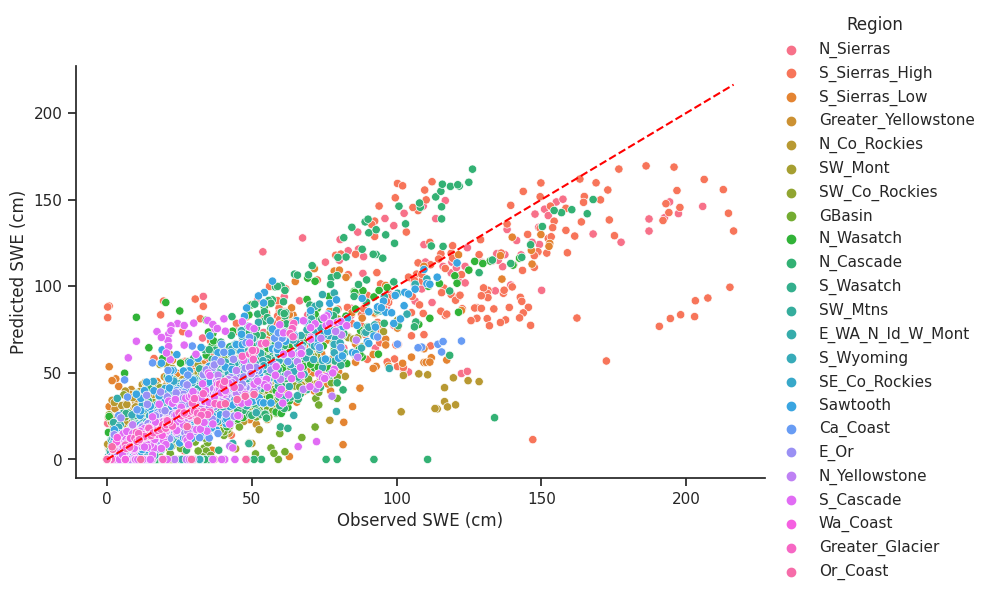

,Region,R2,RMSE,KGE,PBias
0,N_Sierras,0.81,23.64,0.86,5.1
1,S_Sierras_High,0.59,34.12,0.66,5.77
2,S_Sierras_Low,0.82,14.37,0.83,6.46
3,Greater_Yellowstone,0.51,9.91,0.72,-13.14
4,N_Co_Rockies,0.46,16.69,0.5,6.31
5,SW_Mont,0.68,12.31,0.82,-9.41
6,SW_Co_Rockies,0.86,8.26,0.88,2.51
7,GBasin,0.57,12.49,0.75,5.41
8,N_Wasatch,0.79,13.19,0.88,-3.56
9,N_Cascade,0.7,21.13,0.8,-3.29


In [3]:
datelist = Hindcast_Initialization.Hindcast_Initialization(cwd, datapath, HOY, threshold, Region_list, frequency, fSCA = fSCA)

for day in tqdm(datelist):
    Snow = NSM_SCA.NSM_SCA(day, threshold=threshold, Regions = Region_list, modelname = modelname, frequency = frequency, fSCA =  fSCA)
    Snow.SWE_Predict(NewSim = False, Corrections = False, fSCA = fSCA)

#Evaluate hindcase
# Region = Region_list[0]
EvalDF, missingsites = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list, cwd, datapath, modelname, frequency, fSCA = fSCA)

Performance = SSWEET.parityplot(EvalDF)
Performance

## Model Evaluation -  models seem to be liking low epochs (5-10) and mid sized batches ~ 10-100. least amounts of epoch with decent skill improve forecasting performance and transferability

### Training the model on biweekly obs and predicting at a daily resolution works but it is a different model than needed to predict at a weekly resolution.

'N_Sierras':(threshold = 10, fSCA =  True, epochs= 10, batchsize = 60, corrections = False: KGE = 0.86 - Done!

'S_Sierras_High':(threshold = 10, fSCA =  True, epochs= 5 batchsize = 60, corrections = **False**: KGE = 0.66) - Done - revisit with what has been learned from tsting to hindcast

'S_Sierras_Low': (threshold = 10, fSCA =  True, epochs= 60, batchsize = 100, corrections = False: KGE = 0.83 - Done!

'Greater_Yellowstone': (threshold = 10, fSCA =  True, epochs= 7 batchsize = 70, corrections = False: KGE = 0.72) - Done

'N_Co_Rockies':(threshold = 10, fSCA =  True, epochs= 5 batchsize = 70, corrections = **False**: KGE = 0.50) - Done for now, come back later?

'SW_Mont':(threshold = 10, fSCA =  True, epochs= 60, batchsize = 100, corrections = False: KGE = 0.82- Done

'SW_Co_Rockies':(threshold = 10, fSCA =  True, epochs= 8, batchsize = 50, corrections = False: KGE = 0.89

'GBasin':(threshold = 10, fSCA =  True, epochs= 7, batchsize = 40, corrections = **False**: KGE = 0.75

'N_Wasatch': (threshold = 10, fSCA =  True, epochs= 7, batchsize = 60, corrections = False: KGE = 0.88

'N_Cascade':(threshold = 10, fSCA =  True, epochs= 6, batchsize = 60, corrections = False: KGE = 0.8

'S_Wasatch':(threshold = 10, fSCA =  True, epochs= 10, batchsize = 60, corrections = False: KGE = 0.87

'SW_Mtns':(threshold = 10, fSCA =  True, epochs= 15, batchsize = 40, corrections = **False**: KGE = 0.91

'E_WA_N_Id_W_Mont': (threshold = 10, fSCA =  True, epochs= 15, batchsize = 40, corrections = **False**: KGE = 0.87

'S_Wyoming':(threshold = 10, fSCA =  True, epochs= 15, batchsize = 60, corrections = **False**: KGE = 0.93

'SE_Co_Rockies':(threshold = 10, fSCA =  True, epochs= 25, batchsize = 50, corrections = False: KGE = 0.94

'Sawtooth':(threshold = 10, fSCA =  True, epochs= 7, batchsize = 60, corrections = False: KGE = 0.88

'Ca_Coast':(threshold = 10, fSCA =  True, epochs= 70, batchsize = 80, corrections = **False**: KGE = 0.71

'E_Or': (threshold = 10, fSCA =  True, epochs= 7, batchsize = 40, corrections = **False**: KGE = 0.92

'N_Yellowstone':(threshold = 10, fSCA =  True, epochs= 30, batchsize = 60, corrections = False: KGE = 0.83

'S_Cascade':(threshold = 10, fSCA =  True, epochs= 7, batchsize = 40, corrections = **False**: KGE = 0.75

'Wa_Coast':(threshold = 10, fSCA =  True, epochs= 60, batchsize = 40, corrections = False: KGE = 0.83

'Greater_Glacier'::(threshold = 10, fSCA =  True, epochs= 60, batchsize = 60, corrections = False: KGE = 0.80

'Or_Coast':(threshold = 10, fSCA =  True, epochs= 60, batchsize = 60, corrections = **False**: KGE = 0.45


Creating files for a historical simulation within  'N_Sierras', 'S_Sierras_High', 'S_Sierras_Low', 'Greater_Yellowstone', 'N_Co_Rockies', 'SW_Mont', 'SW_Co_Rockies', 'GBasin', 'N_Wasatch', 'N_Cascade', 'S_Wasatch', 'SW_Mtns', 'E_WA_N_Id_W_Mont', 'S_Wyoming', 'SE_Co_Rockies', 'Sawtooth', 'Ca_Coast', 'E_Or', 'N_Yellowstone', 'S_Cascade', 'Wa_Coast', 'Greater_Glacier', 'Or_Coast'  regions for water year  2019


  1%|          | 3/263 [00:19<27:59,  6.46s/it]

No snow in region:  Or_Coast


  2%|▏         | 4/263 [00:25<27:34,  6.39s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Or_Coast


  2%|▏         | 5/263 [00:31<26:39,  6.20s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Or_Coast


  2%|▏         | 6/263 [00:37<25:53,  6.05s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Or_Coast


  3%|▎         | 7/263 [00:43<25:44,  6.03s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Or_Coast


  3%|▎         | 8/263 [00:49<25:25,  5.98s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  3%|▎         | 9/263 [00:54<24:36,  5.81s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  4%|▍         | 10/263 [01:00<24:04,  5.71s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  4%|▍         | 11/263 [01:05<23:34,  5.61s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  5%|▍         | 12/263 [01:11<23:32,  5.63s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  5%|▍         | 13/263 [01:16<23:26,  5.63s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  5%|▌         | 14/263 [01:22<23:15,  5.61s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  6%|▌         | 15/263 [01:27<22:56,  5.55s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  6%|▌         | 16/263 [01:33<22:37,  5.49s/it]

No snow in region:  S_Sierras_Low
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  6%|▋         | 17/263 [01:38<22:24,  5.47s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  7%|▋         | 18/263 [01:43<22:19,  5.47s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  7%|▋         | 19/263 [01:49<21:58,  5.41s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


  8%|▊         | 20/263 [01:54<21:31,  5.31s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


  8%|▊         | 21/263 [01:59<20:59,  5.20s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  N_Yellowstone
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


  8%|▊         | 22/263 [02:04<21:08,  5.26s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  N_Yellowstone
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


  9%|▊         | 23/263 [02:09<20:39,  5.16s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  N_Yellowstone
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


  9%|▉         | 24/263 [02:14<20:00,  5.02s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 10%|▉         | 25/263 [02:19<20:13,  5.10s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 10%|▉         | 26/263 [02:24<19:53,  5.04s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 10%|█         | 27/263 [02:29<19:30,  4.96s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 11%|█         | 28/263 [02:34<19:11,  4.90s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 11%|█         | 29/263 [02:40<20:32,  5.27s/it]

No snow in region:  S_Sierras_Low
No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 11%|█▏        | 30/263 [02:45<20:13,  5.21s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 12%|█▏        | 31/263 [02:50<20:20,  5.26s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 12%|█▏        | 32/263 [02:56<20:25,  5.30s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 13%|█▎        | 33/263 [03:01<20:13,  5.28s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 13%|█▎        | 34/263 [03:06<20:09,  5.28s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 13%|█▎        | 35/263 [03:12<20:37,  5.43s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 14%|█▎        | 36/263 [03:17<20:48,  5.50s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 14%|█▍        | 37/263 [03:23<20:58,  5.57s/it]

No snow in region:  Or_Coast


 14%|█▍        | 38/263 [03:29<21:40,  5.78s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 15%|█▍        | 39/263 [03:35<21:31,  5.77s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 15%|█▌        | 40/263 [03:41<20:57,  5.64s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 16%|█▌        | 41/263 [03:47<21:22,  5.78s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 16%|█▌        | 42/263 [03:53<21:26,  5.82s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 16%|█▋        | 43/263 [03:59<21:33,  5.88s/it]

No snow in region:  Wa_Coast


 17%|█▋        | 44/263 [04:05<22:13,  6.09s/it]

No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 17%|█▋        | 45/263 [04:10<21:10,  5.83s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 17%|█▋        | 46/263 [04:16<20:41,  5.72s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 18%|█▊        | 47/263 [04:22<20:47,  5.78s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 18%|█▊        | 48/263 [04:27<20:30,  5.72s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 19%|█▊        | 49/263 [04:33<20:08,  5.65s/it]

No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 19%|█▉        | 50/263 [04:38<19:32,  5.51s/it]

No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 19%|█▉        | 51/263 [04:44<19:29,  5.52s/it]

No snow in region:  S_Wasatch
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 20%|█▉        | 52/263 [04:49<19:47,  5.63s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 20%|██        | 53/263 [04:55<19:38,  5.61s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 21%|██        | 54/263 [05:01<19:30,  5.60s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 21%|██        | 55/263 [05:06<19:21,  5.59s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 21%|██▏       | 56/263 [05:12<19:09,  5.55s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 24%|██▍       | 63/263 [05:56<21:25,  6.43s/it]

No snow in region:  Wa_Coast


 25%|██▍       | 65/263 [06:09<20:58,  6.36s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 25%|██▌       | 66/263 [06:15<20:16,  6.18s/it]

No snow in region:  Wa_Coast


 25%|██▌       | 67/263 [06:21<20:01,  6.13s/it]

No snow in region:  Wa_Coast


 34%|███▍      | 90/263 [08:50<18:32,  6.43s/it]

No snow in region:  Wa_Coast


 35%|███▌      | 93/263 [09:10<18:42,  6.60s/it]

No snow in region:  Wa_Coast


 37%|███▋      | 96/263 [09:29<18:08,  6.52s/it]

No snow in region:  Or_Coast


 37%|███▋      | 97/263 [09:36<17:52,  6.46s/it]

No snow in region:  Or_Coast


 37%|███▋      | 98/263 [09:42<17:32,  6.38s/it]

No snow in region:  Or_Coast


 38%|███▊      | 99/263 [09:48<17:24,  6.37s/it]

No snow in region:  Or_Coast


 38%|███▊      | 100/263 [09:54<17:02,  6.28s/it]

No snow in region:  Or_Coast


 38%|███▊      | 101/263 [10:00<16:36,  6.15s/it]

No snow in region:  Or_Coast


 41%|████      | 107/263 [10:39<16:21,  6.29s/it]

No snow in region:  Or_Coast


 41%|████      | 108/263 [10:46<16:44,  6.48s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 41%|████▏     | 109/263 [10:52<16:30,  6.43s/it]

No snow in region:  Or_Coast


 42%|████▏     | 110/263 [10:58<16:12,  6.36s/it]

No snow in region:  Or_Coast


 42%|████▏     | 111/263 [11:04<15:48,  6.24s/it]

No snow in region:  Or_Coast


 43%|████▎     | 112/263 [11:10<15:28,  6.15s/it]

No snow in region:  Or_Coast


 43%|████▎     | 113/263 [11:16<15:16,  6.11s/it]

No snow in region:  Or_Coast


 43%|████▎     | 114/263 [11:23<15:56,  6.42s/it]

No snow in region:  Or_Coast


 44%|████▎     | 115/263 [11:30<15:47,  6.40s/it]

No snow in region:  Or_Coast


 45%|████▍     | 118/263 [11:48<15:09,  6.27s/it]

No snow in region:  Or_Coast


 45%|████▌     | 119/263 [11:55<15:26,  6.43s/it]

No snow in region:  Or_Coast


 46%|████▌     | 120/263 [12:01<15:25,  6.47s/it]

No snow in region:  Or_Coast


 46%|████▌     | 121/263 [12:08<15:17,  6.46s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 46%|████▋     | 122/263 [12:14<14:56,  6.36s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 47%|████▋     | 123/263 [12:20<14:32,  6.23s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 47%|████▋     | 124/263 [12:26<14:11,  6.12s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 48%|████▊     | 125/263 [12:31<13:48,  6.00s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 48%|████▊     | 126/263 [12:38<14:09,  6.20s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 48%|████▊     | 127/263 [12:44<13:50,  6.11s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 49%|████▊     | 128/263 [12:50<13:32,  6.02s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 49%|████▉     | 129/263 [12:56<13:17,  5.95s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 49%|████▉     | 130/263 [13:01<12:59,  5.86s/it]

No snow in region:  Or_Coast


 50%|████▉     | 131/263 [13:08<13:29,  6.13s/it]

No snow in region:  Or_Coast


 50%|█████     | 132/263 [13:15<13:40,  6.27s/it]

No snow in region:  Or_Coast


 51%|█████     | 133/263 [13:21<13:52,  6.41s/it]

No snow in region:  Or_Coast


 51%|█████     | 134/263 [13:28<13:42,  6.38s/it]

No snow in region:  Or_Coast


 51%|█████▏    | 135/263 [13:34<13:26,  6.30s/it]

No snow in region:  Or_Coast


 52%|█████▏    | 136/263 [13:40<13:12,  6.24s/it]

No snow in region:  Or_Coast


 52%|█████▏    | 137/263 [13:47<13:25,  6.40s/it]

No snow in region:  Or_Coast


 52%|█████▏    | 138/263 [13:53<13:31,  6.49s/it]

No snow in region:  Or_Coast


 53%|█████▎    | 139/263 [14:00<13:30,  6.53s/it]

No snow in region:  Or_Coast


 53%|█████▎    | 140/263 [14:06<13:19,  6.50s/it]

No snow in region:  Or_Coast


 54%|█████▎    | 141/263 [14:13<13:01,  6.41s/it]

No snow in region:  Or_Coast


 54%|█████▍    | 142/263 [14:19<12:49,  6.36s/it]

No snow in region:  Or_Coast


 64%|██████▍   | 168/263 [17:11<10:20,  6.53s/it]

No snow in region:  Or_Coast


 64%|██████▍   | 169/263 [17:17<10:03,  6.42s/it]

No snow in region:  Or_Coast


 70%|██████▉   | 183/263 [18:51<08:57,  6.72s/it]

No snow in region:  Wa_Coast


 70%|██████▉   | 184/263 [18:57<08:37,  6.56s/it]

No snow in region:  Or_Coast


 70%|███████   | 185/263 [19:03<08:19,  6.40s/it]

No snow in region:  Or_Coast


 71%|███████   | 186/263 [19:09<08:04,  6.29s/it]

No snow in region:  Or_Coast


 71%|███████   | 187/263 [19:15<07:52,  6.21s/it]

No snow in region:  Or_Coast


 71%|███████▏  | 188/263 [19:22<08:04,  6.46s/it]

No snow in region:  Or_Coast


 75%|███████▌  | 198/263 [20:27<07:06,  6.57s/it]

No snow in region:  Or_Coast


 76%|███████▌  | 199/263 [20:34<06:57,  6.53s/it]

No snow in region:  Or_Coast


 76%|███████▌  | 200/263 [20:40<06:48,  6.48s/it]

No snow in region:  Or_Coast


 76%|███████▋  | 201/263 [20:47<06:41,  6.47s/it]

No snow in region:  Or_Coast


 77%|███████▋  | 202/263 [20:53<06:34,  6.46s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 77%|███████▋  | 203/263 [20:59<06:19,  6.33s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 78%|███████▊  | 204/263 [21:05<06:05,  6.19s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 78%|███████▊  | 205/263 [21:11<06:05,  6.31s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 78%|███████▊  | 206/263 [21:18<05:59,  6.30s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 79%|███████▊  | 207/263 [21:24<05:49,  6.25s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 79%|███████▉  | 208/263 [21:30<05:41,  6.21s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 79%|███████▉  | 209/263 [21:36<05:31,  6.14s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 80%|███████▉  | 210/263 [21:42<05:16,  5.98s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 80%|████████  | 211/263 [21:48<05:18,  6.12s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 81%|████████  | 212/263 [21:54<05:14,  6.17s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 81%|████████  | 213/263 [22:00<05:07,  6.15s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 81%|████████▏ | 214/263 [22:06<04:55,  6.03s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 82%|████████▏ | 215/263 [22:12<04:42,  5.88s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 82%|████████▏ | 216/263 [22:18<04:42,  6.01s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 83%|████████▎ | 217/263 [22:24<04:36,  6.02s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 83%|████████▎ | 218/263 [22:30<04:31,  6.04s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 83%|████████▎ | 219/263 [22:36<04:27,  6.07s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 84%|████████▎ | 220/263 [22:42<04:21,  6.08s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 84%|████████▍ | 221/263 [22:49<04:16,  6.11s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 84%|████████▍ | 222/263 [22:55<04:11,  6.13s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 85%|████████▍ | 223/263 [23:01<04:04,  6.11s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 85%|████████▌ | 224/263 [23:07<03:57,  6.09s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 86%|████████▌ | 225/263 [23:13<03:56,  6.23s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 86%|████████▌ | 226/263 [23:20<03:49,  6.20s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 86%|████████▋ | 227/263 [23:25<03:38,  6.07s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 87%|████████▋ | 228/263 [23:31<03:27,  5.93s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 87%|████████▋ | 229/263 [23:36<03:17,  5.80s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 87%|████████▋ | 230/263 [23:43<03:16,  5.97s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 88%|████████▊ | 231/263 [23:49<03:12,  6.02s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 88%|████████▊ | 232/263 [23:55<03:08,  6.07s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 89%|████████▊ | 233/263 [24:01<03:04,  6.15s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 89%|████████▉ | 234/263 [24:08<02:58,  6.16s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 89%|████████▉ | 235/263 [24:14<02:52,  6.15s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 90%|████████▉ | 236/263 [24:20<02:45,  6.14s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 90%|█████████ | 237/263 [24:26<02:42,  6.24s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 90%|█████████ | 238/263 [24:32<02:34,  6.19s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 91%|█████████ | 239/263 [24:38<02:25,  6.07s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 91%|█████████▏| 240/263 [24:44<02:17,  5.96s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 92%|█████████▏| 241/263 [24:50<02:09,  5.90s/it]

No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 92%|█████████▏| 242/263 [24:55<02:02,  5.84s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 92%|█████████▏| 243/263 [25:02<01:59,  5.98s/it]

No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 93%|█████████▎| 244/263 [25:07<01:51,  5.86s/it]

No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 93%|█████████▎| 245/263 [25:13<01:44,  5.78s/it]

No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 94%|█████████▎| 246/263 [25:19<01:39,  5.83s/it]

No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 94%|█████████▍| 247/263 [25:24<01:31,  5.74s/it]

No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 94%|█████████▍| 248/263 [25:30<01:26,  5.76s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 95%|█████████▍| 249/263 [25:35<01:18,  5.58s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 95%|█████████▌| 250/263 [25:41<01:12,  5.54s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 95%|█████████▌| 251/263 [25:47<01:08,  5.67s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Ca_Coast
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 96%|█████████▌| 252/263 [25:52<01:01,  5.56s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 96%|█████████▌| 253/263 [25:57<00:55,  5.54s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 97%|█████████▋| 254/263 [26:03<00:49,  5.48s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 97%|█████████▋| 255/263 [26:08<00:43,  5.44s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 97%|█████████▋| 256/263 [26:13<00:37,  5.31s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 98%|█████████▊| 257/263 [26:18<00:31,  5.18s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 98%|█████████▊| 258/263 [26:24<00:26,  5.38s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 98%|█████████▊| 259/263 [26:29<00:21,  5.44s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  N_Yellowstone
No snow in region:  Wa_Coast
No snow in region:  Greater_Glacier
No snow in region:  Or_Coast


 99%|█████████▉| 260/263 [26:35<00:16,  5.36s/it]

No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


 99%|█████████▉| 261/263 [26:40<00:10,  5.45s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


100%|█████████▉| 262/263 [26:46<00:05,  5.44s/it]

No snow in region:  S_Wasatch
No snow in region:  SE_Co_Rockies
No snow in region:  E_Or
No snow in region:  Wa_Coast
No snow in region:  Or_Coast


100%|██████████| 263/263 [26:51<00:00,  6.13s/it]


Getting prediction files
Site data processing complete, setting up prediction dataframes...
Finalizing Evaluation dataframes...
There were  0  sites missing from the prediction dataset occuring on  []


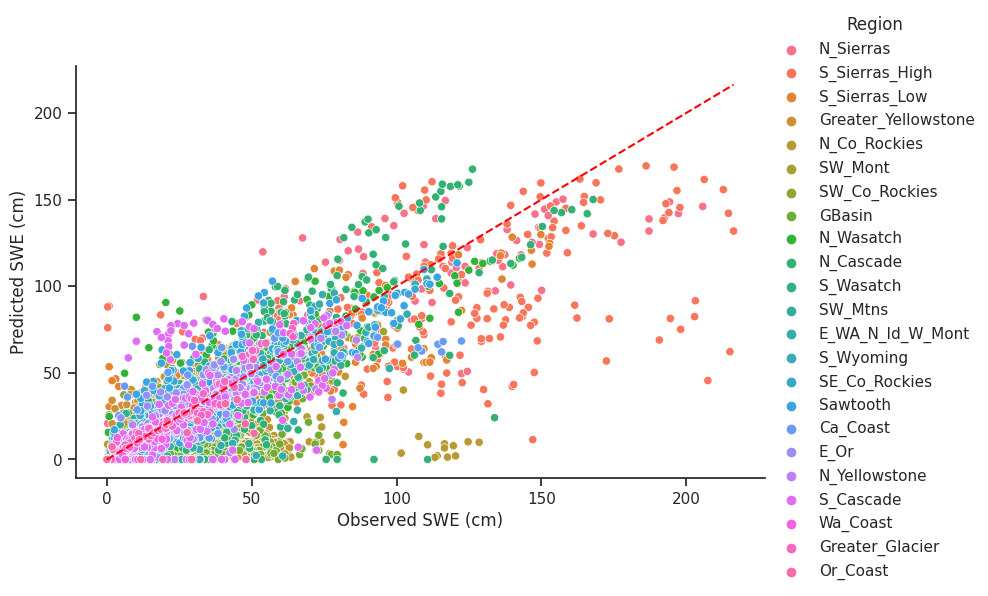

,Region,R2,RMSE,KGE,PBias
0,N_Sierras,0.81,23.64,0.86,5.1
1,S_Sierras_High,0.47,38.96,0.6,15.43
2,S_Sierras_Low,0.82,14.37,0.83,6.46
3,Greater_Yellowstone,0.5,9.96,0.72,-12.11
4,N_Co_Rockies,-0.68,29.38,-0.18,55.95
5,SW_Mont,0.68,12.3,0.82,-9.2
6,SW_Co_Rockies,0.86,8.26,0.88,2.51
7,GBasin,-0.02,19.25,0.34,33.26
8,N_Wasatch,0.79,13.14,0.88,-3.0
9,N_Cascade,0.69,21.58,0.8,5.94


In [29]:
#Run on sim with corrections = True, one False, Finalize with if/else if there is a different among regions
datelist = Hindcast_Initialization.Hindcast_Initialization(cwd, datapath, HOY, threshold, Region_list, frequency, fSCA = fSCA)

for day in tqdm(datelist):
    Snow = NSM_SCA.NSM_SCA(day, threshold=threshold, Regions = Region_list, modelname = modelname, frequency = frequency, fSCA =  fSCA)
    Snow.SWE_Predict(NewSim = False, Corrections = True, fSCA = fSCA)

#Evaluate hindcase
Region = Region_list[0]
EvalDF, missingsites = Hindcast_Initialization.HindCast_DataProcess(datelist,Region_list, cwd, datapath, modelname, frequency, fSCA = fSCA)

Performance = SSWEET.parityplot(EvalDF)
Performance

## Perform Preliminary Model Evaluation

How does your model performance? 
We are using simple model evaluation metrics of R2 and RMSE to guage model performance.
You will perform a more exhaustive model evaluation in the [Evaluation]('./evaluation.ipynb') chapter.

### Model Evaluation

Now that we have a trained model producing acceptable performance, it is time to more rigorously evaluate its performance using the [Standardized Snow Water Equivalent Tool](./SSWEET.py) within an interactive [evaluation notebook](./evaluation.ipynb).

In [ ]:
#save model weights and key criteria to AWS S3 for all regions, push data to AWS
modelname = 'Neural_Network'
Region = 'N_Sierras'
MLP_Model.save_model_AWS(modelname, Region, frequency, fSCA)